## Exercise 1


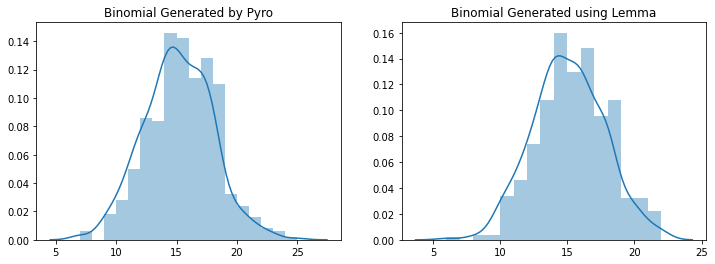

In [84]:
import torch
import pyro
import seaborn as sns 
import matplotlib.pyplot as plt

#my binomial function
def binomial(a, b):
    bernoulli = dist.Bernoulli(b)
    bernoulli.sample = [pyro.sample("n", bernoulli).item() for i in range(a)]
    bernoulli.sample = sum(bernoulli.sample)
    return bernoulli.sample 

#samples
binomial_auto = dist.Binomial(30, 0.5)
binomial_auto_samples = [pyro.sample("n", binomial_auto ) for i in range(500)]
binomial_samples = [binomial(30, 0.5) for i in range(500)]

#plot
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.distplot(binomial_auto_samples, ax=axes[0])
sns.distplot(binomial_samples, ax=axes[1])
axes[0].set_title('Binomial Generated by Pyro')
axes[1].set_title('Binomial Generated using Lemma')
plt.show()

## Exercise 2

### 1. 
If the posterior distribution $p(\theta|x)$ belongs to the same family as the prior distribution $p(\theta)$, then the prior is said to be a **conjugate prior** for the likelihood function $p(x|\theta)$.
In our case:


\begin{equation*}
\lambda \sim \text{Gamma}(\alpha, \beta)
\end{equation*}

\begin{equation*}
x \sim \text{Poisson}(\lambda)
\end{equation*}


Where the probability distribution for the Poission likelihood is


\begin{equation*}
P(x_i | \lambda) = \frac {\lambda^{x_i} e^{-\lambda}}{x_i !}
\end{equation*}


And the prior distribution


\begin{equation*}
P(\lambda) = \frac{\beta^{\alpha}}{\Gamma (\alpha)} \lambda^{\alpha -1} e^{-\beta \lambda}
\end{equation*}


And the Bayes Theorem states for a vector of n observations $\vec{x}$


\begin{equation*}
P(\lambda|\vec{x}) =\frac{P(\vec{x}|\lambda)P(\lambda)}{P(\vec{x})}
\end{equation*}


The denominator doesn't contain $\lambda$, so


\begin{equation*}
P(\lambda|\vec{x}) \propto P(\vec{x}|\lambda)P(\lambda) 
\end{equation*}


If every x is independent


\begin{equation*}
P(\vec{x}|\lambda) = \prod^n_{i=1} \frac{\lambda^{x_i}e^{-\lambda}}{x_i !} = \frac{\lambda^{\sum^n_{i=1} x_i}e^{-n\lambda}}{\prod^n_{i=1} x_i !} \propto \lambda^{n\overline{x}} e^{-n\lambda}
\end{equation*}


So once again the posterior is, dropping all the terms not related to $\lambda$ as before


\begin{equation*}
P(\lambda|\vec{x}) \propto P(\vec{x}|\lambda)P(\lambda)=\lambda^{n\overline{x}} e^{-n\lambda} \lambda^{\alpha -1} e^{-\beta \lambda} = \lambda^{n\overline{x}+\alpha -1}e^{-(\beta +n)\lambda} \sim Gamma(n\overline{x}+\alpha,\beta +n)
\end{equation*}


So we have proved that Gamma distribution is a conjugate prior for the Poisson likelihood.

### 2.

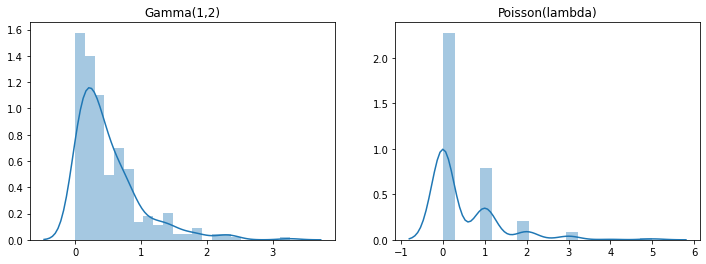

In [98]:
import torch
import pyro
import seaborn as sns 
import matplotlib.pyplot as plt


#samples
gamma_auto = dist.Gamma(1, 2)
#get 300 gamma samples
gamma_auto_samples = [pyro.sample("n", gamma_auto ).item() for i in range(300)]
#get 300 x for a poisson distibution with the found-before gammas
poisson_samples = [pyro.sample("n", dist.Poisson(gamma_auto_samples[i]) ) for i in range(300)]

#plot
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.distplot(gamma_auto_samples, ax=axes[0])
sns.distplot(poisson_samples, ax=axes[1])
axes[0].set_title('Gamma(1,2)')
axes[1].set_title('Poisson(lambda)')
plt.show()

### 3.

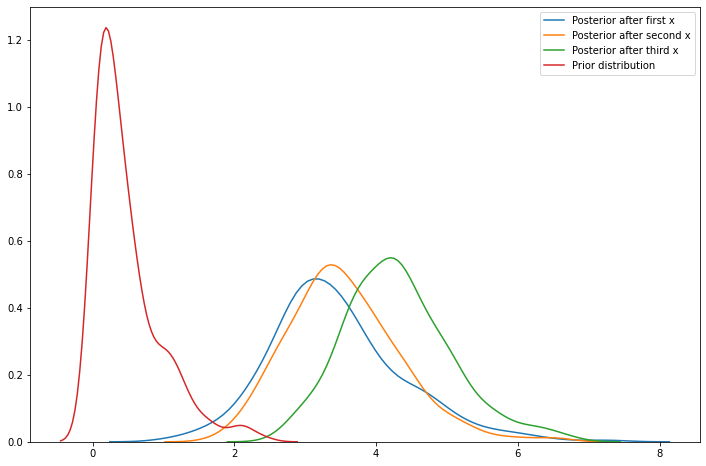

In [126]:
import torch
import pyro
import seaborn as sns 
import matplotlib.pyplot as plt

prior_list = [1, 2]
x = [3, 10]
lamb_posterior_samples = [pyro.sample("lambda_posterior", dist.Gamma(prior_list[0] + sum(x), prior_list[1] + len(x)))for i in range(300)]
x1 = [3, 10, 2, 5]
lamb_posterior_samples1 = [pyro.sample("lambda_posterior", dist.Gamma(prior_list[0] + sum(x1), prior_list[1] + len(x1)))for i in range(300)]
x2 = [3, 10, 2, 5, 6, 7]
lamb_posterior_samples2 = [pyro.sample("lambda_posterior", dist.Gamma(prior_list[0] + sum(x2), prior_list[1] + len(x2)))for i in range(300)]
prior_samples = [pyro.sample("Prior", dist.Gamma(prior_list[0], prior_list[1]))for i in range(300)]


#plot
plt.figure("Lambda distribustions",figsize=(12,8))
sns.distplot(lamb_posterior_samples, hist=False, label = 'Posterior after first x')
sns.distplot(lamb_posterior_samples1, hist=False, label = 'Posterior after second x')
sns.distplot(lamb_posterior_samples2, hist=False, label = 'Posterior after third x')
sns.distplot(prior_samples, hist=False, label = 'Prior distribution')
plt.legend()
plt.show()